In [12]:
import numpy as np 
import pandas as pd 
from pylab import plt,mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
pd.set_option('precision', 4) 
np.set_printoptions(suppress=True, precision=4)
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
data = pd.read_csv(url,index_col = 0,parse_dates = True).dropna()

<AxesSubplot:xlabel='Date'>

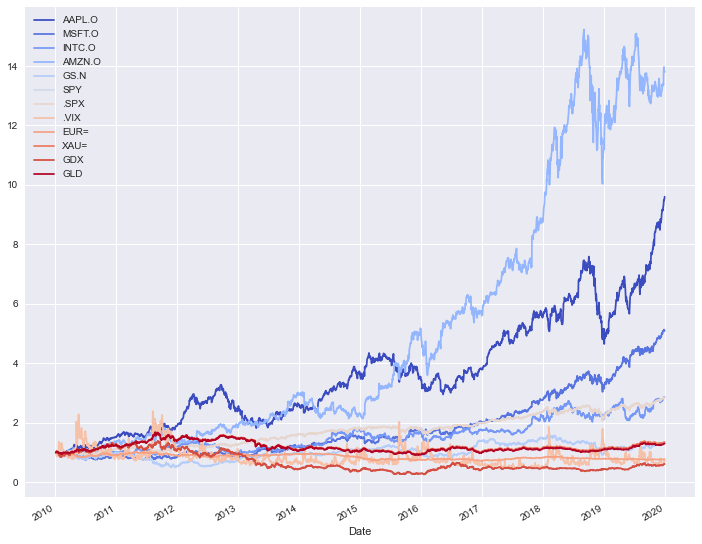

In [13]:
(data/data.iloc[0]).plot(figsize=(12,10),cmap= 'coolwarm')

In [48]:
lags = 7

def add_lags(data,ric,lags):
    cols = []
    df= pd.DataFrame(data[ric])
    for lag in range(1,lags+1):
        col = 'lag_{}'.format(lag)
        df[col]=df[ric].shift(lag)
        cols.append(col)
    df.dropna(inplace = True)
    return df,cols

In [49]:
dfs= {}
for sym in data.columns:
    df,cols = add_lags(data,sym,lags)
    dfs[sym] = df


In [51]:
dfs[sym].head(7)

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-13,111.54,110.49,112.85,111.37,110.82,111.51,109.70,109.80
2010-01-14,112.03,111.54,110.49,112.85,111.37,110.82,111.51,109.70
2010-01-15,110.86,112.03,111.54,110.49,112.85,111.37,110.82,111.51
2010-01-19,111.52,110.86,112.03,111.54,110.49,112.85,111.37,110.82
2010-01-20,108.94,111.52,110.86,112.03,111.54,110.49,112.85,111.37
2010-01-21,107.37,108.94,111.52,110.86,112.03,111.54,110.49,112.85
2010-01-22,107.17,107.37,108.94,111.52,110.86,112.03,111.54,110.49


In [58]:
regs = {}
for sym in data.columns:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols],df[sym],rcond = -1)[0]
    regs[sym] = reg

rega = np.stack(tuple(regs.values()))
regd = pd.DataFrame(rega,columns = cols,index = data.columns)

In [59]:
dfs[sym].corr()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-13,111.54,110.49,112.85,111.37,110.82,111.51,109.70,109.80
2010-01-14,112.03,111.54,110.49,112.85,111.37,110.82,111.51,109.70
2010-01-15,110.86,112.03,111.54,110.49,112.85,111.37,110.82,111.51
2010-01-19,111.52,110.86,112.03,111.54,110.49,112.85,111.37,110.82
2010-01-20,108.94,111.52,110.86,112.03,111.54,110.49,112.85,111.37
...,...,...,...,...,...,...,...,...
2019-12-24,141.27,139.95,139.52,139.38,139.02,139.01,139.04,139.05
2019-12-26,142.38,141.27,139.95,139.52,139.38,139.02,139.01,139.04
2019-12-27,142.33,142.38,141.27,139.95,139.52,139.38,139.02,139.01


In [63]:
rets = np.log(data/data.shift(1))

In [73]:
rets.dropna(inplace = True)
dfs = {}
for sym in data:
    print('cols = ',cols)
    df, cols = add_lags(rets,sym,lags)
    mu, std  = df[cols].mean(), df[cols].std()
    df[cols] = (df[cols] - mu) / std
    dfs[sym] = df

cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
cols =  ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']


In [78]:
dfs[sym].head()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-14,0.0044,0.9570,-2.1692,1.3386,0.4959,-0.6434,1.6613,-0.1028
2010-01-15,-0.0105,0.4379,0.9571,-2.1689,1.3388,0.4966,-0.6436,1.6614
2010-01-19,0.0059,-1.0842,0.4385,0.9562,-2.1690,1.3395,0.4958,-0.6435
2010-01-20,-0.0234,0.5967,-1.0823,0.4378,0.9564,-2.1686,1.3383,0.4958
2010-01-21,-0.0145,-2.4045,0.5971,-1.0825,0.4379,0.9571,-2.1680,1.3384


In [77]:
j

12

In [83]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [84]:
for sym in data.columns:
    df = dfs[sym]
    model = MLPRegressor(hidden_layer_sizes = [512],
                         random_state = 100,
                         max_iter = 1000, 
                         early_stopping = True, 
                         validation_fraction = 0.15,
                         shuffle= False)
    model.fit(df[cols],df[sym])
    pred = model.predict(df[cols])
    acc = accuracy_score(np.sign(df[sym]),np.sign(pred))
    
    

/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3

In [85]:
acc

0.5259170653907496

In [86]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']

In [87]:
pred

array([ 0.0307,  0.0151,  0.014 , ...,  0.0116, -0.0008,  0.0036])

In [88]:
# using the keras package instead of mlp regressor 

import tensorflow as tf 
from keras.layers import Dense
from keras.models import Sequential


Using TensorFlow backend.


In [89]:
np.random.seed(100)
tf.random.set_seed(100)

def create_model(problem = 'regression'):
    model = Sequential()
    model.add(Dense(512,input_dim = len(cols),activation = 'relu'))
    if problem == 'regression':
        model.add(Dense(1,activation = 'linear'))
        model.compile(loss = 'mse',optimizer = 'adam')
    else:
        model.add(Dense(1,activation = 'sigmoid'))
        model.compile(loss = 'binary_crossentropy',optimizer = 'adam')
    return model

In [91]:
for sym in data.columns[:]:
    df = dfs[sym]
    model = create_model()
    model.fit(df[cols],df[sym],epochs = 25,verbose = False)
    pred = model.predict(df[cols])
    acc = accuracy_score(np.sign(df[sym]),np.sign(pred))
    print(f'DNN | {sym:10s} | acc={acc:.4f}')

DNN | AAPL.O     | acc=0.6316
DNN | MSFT.O     | acc=0.5474
DNN | INTC.O     | acc=0.6108
DNN | AMZN.O     | acc=0.5917
DNN | GS.N       | acc=0.5945
DNN | SPY        | acc=0.5849
DNN | .SPX       | acc=0.5622
DNN | .VIX       | acc=0.6272
DNN | EUR=       | acc=0.5706
DNN | XAU=       | acc=0.5542
DNN | GDX        | acc=0.5762
DNN | GLD        | acc=0.5953


In [92]:
# testing out of sample 
split = int(len(dfs[sym])*0.8)

In [93]:
for sym in data.columns:
    df = dfs[sym]
    train = df.iloc[:split]
    reg = np.linalg.lstsq(train[cols],train[sym],rcond = -1)[0]
    test = df.iloc[split:]
    pred = np.dot(test[cols],reg)
    acc = accuracy_score(np.sign(test[sym]),np.sign(pred))
    print(f'OLS | {sym:10s} | acc={acc:.4f}')
    

OLS | AAPL.O     | acc=0.5219
OLS | MSFT.O     | acc=0.4960
OLS | INTC.O     | acc=0.5418
OLS | AMZN.O     | acc=0.4841
OLS | GS.N       | acc=0.4980
OLS | SPY        | acc=0.5020
OLS | .SPX       | acc=0.5120
OLS | .VIX       | acc=0.5458
OLS | EUR=       | acc=0.4482
OLS | XAU=       | acc=0.5299
OLS | GDX        | acc=0.5159
OLS | GLD        | acc=0.5100
